<a href="https://colab.research.google.com/github/futureCodersSE/data-roles/blob/main/Data_consolidation_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
def import_data(url):
  df = pd.read_excel(url+"?raw=true", index_col=0)
  return df

hrgo_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/hrgo_df.xlsx")
jobsinkent_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/jobsinkent_df.xlsx")
full_reed_df = import_data("https://github.com/futureCodersSE/data-roles/blob/main/reed_full_job_df.xlsx")
df_list = [hrgo_df,jobsinkent_df,full_reed_df]

,jobTitle,employerName,salary,contractType,locationName,jobUrl
0,Data Lead,Reed,"£27,000 - £39,000 per annum, inc benefits",Permanent,Folkestone,https://www.reed.co.uk/jobs/data-lead/48401296
1,Data Analyst,Senitor Associates,"£35,000 - £45,000 per annum",Permanent,Sittingbourne,https://www.reed.co.uk/jobs/data-analyst/48120219
2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150
3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718
4,Data Analyst,OnetoOne Personnel,"£33,000 - £50,000 per annum",Permanent,Leigh-on-Sea,https://www.reed.co.uk/jobs/data-analyst/48465441
...,...,...,...,...,...,...
1592,NaN,NaN,NaN,NaN,NaN,NaN
1593,NaN,NaN,NaN,NaN,NaN,NaN
1594,NaN,NaN,NaN,NaN,NaN,NaN
1595,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
display(full_reed_df.info())
reed_df = full_reed_df[["jobTitle", "employerName", "salary", "contractType", "locationName",  "jobUrl"]]
reed_df["salary"].replace(np.nan, '', regex=False,inplace=True)
reed_df.dropna(inplace=True)
reed_df.rename(columns={"jobTitle":"job_title", "employerName": "company", "contractType":"contract", "locationName":"location",  "jobUrl":"job_url"}, inplace=True)


reed_df["advertised_on"] = "reed.co.uk"
hrgo_df["advertised_on"] = "hrgo.co.uk/jobs"
jobsinkent_df["advertised_on"] = "jobsinkent.com/search"

all_jobs_df = reed_df.append([hrgo_df,jobsinkent_df],ignore_index=True)
all_jobs_df["company"] = all_jobs_df["company"].str.lstrip(" ").str.rstrip(" ")
display(all_jobs_df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employerId           1581 non-null   float64
 1   employerName         1581 non-null   object 
 2   jobId                1581 non-null   float64
 3   jobTitle             1581 non-null   object 
 4   locationName         1581 non-null   object 
 5   minimumSalary        1284 non-null   float64
 6   maximumSalary        1284 non-null   float64
 7   yearlyMinimumSalary  1284 non-null   float64
 8   yearlyMaximumSalary  1284 non-null   float64
 9   currency             1284 non-null   object 
 10  salaryType           1581 non-null   object 
 11  salary               1284 non-null   object 
 12  datePosted           1581 non-null   object 
 13  expirationDate       1581 non-null   object 
 14  externalUrl          283 non-null    object 
 15  jobUrl               1581 non-null   o

None

,job_title,company,salary,contract,location,job_url,advertised_on
0,Data Lead,Reed,"£27,000 - £39,000 per annum, inc benefits",Permanent,Folkestone,https://www.reed.co.uk/jobs/data-lead/48401296,reed.co.uk
1,Data Analyst,Senitor Associates,"£35,000 - £45,000 per annum",Permanent,Sittingbourne,https://www.reed.co.uk/jobs/data-analyst/48120219,reed.co.uk
2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
4,Data Analyst,OnetoOne Personnel,"£33,000 - £50,000 per annum",Permanent,Leigh-on-Sea,https://www.reed.co.uk/jobs/data-analyst/48465441,reed.co.uk
...,...,...,...,...,...,...,...
1641,"Pre-Sales Consultant - SQL, SaaS, Data - Hybri...",Jump IT Recruitment Solutions Limited,To £48K+Bens+Opportunity,"permanent,full-time",Kent,https://jobsinkent.com/job/2356058,jobsinkent.com/search
1642,Invoice Data Entry Clerk,Connect2Staff,£9.50 - £10 per hour,"contract,full-time","Aylesford, Tonbridge and Malling, Kent",https://jobsinkent.com/job/2421116,jobsinkent.com/search
1643,Data cable Engineer - Fulham ASAP,PW Construction,Negotiable,"permanent,full-time","Fulham, Greater London",https://jobsinkent.com/job/2313664,jobsinkent.com/search
1644,Data Administrator,Hays Specialist Recruitment,Up to £23500.00 per annum,"permanent,full-time","Slough, Berkshire",https://jobsinkent.com/job/2116836,jobsinkent.com/search


In [ ]:
def salary_to_float(salary_str):
  salary_str =  salary_str.replace("£","").replace(",","").split(" per")[0]
  if "-" in salary_str:
    salary_str = salary_str.split("-")[1]
  if "to " in salary_str:
    salary_str = salary_str.split("to ")[1]
  return float(salary_str)
  


per_annum_jobs = all_jobs_df[all_jobs_df["salary"].str.contains("per annum")] #all_jobs_df.apply(return_per_annum,axis=1)
per_hour_jobs = all_jobs_df[all_jobs_df["salary"].str.contains("per hour")]

nee_annum_hour = all_jobs_df.drop(all_jobs_df.iloc[per_annum_jobs.index].index)
nee_annum_hour.drop(all_jobs_df.iloc[per_hour_jobs.index].index,inplace=True)


per_annum_jobs["salary"] = per_annum_jobs["salary"].apply(salary_to_float)
per_hour_jobs["salary"] = per_hour_jobs["salary"].apply(salary_to_float)

display(nee_annum_hour)
display(per_annum_jobs)
display(per_hour_jobs)

#per_hour_jobs

In [145]:
#display(all_jobs_df.groupby("company").count().sort_values("job_title",ascending=False))
add_per_company = all_jobs_df.groupby("company").count().sort_values("job_title",ascending=False)
add_per_company.drop(add_per_company[add_per_company["job_title"]==1].index, inplace=True)
display(add_per_company)

,job_title,salary,contract,location,job_url,advertised_on
company,,,,,,
Reed,108,108,108,108,108,108
Bennett & Game Recruitment,80,80,80,80,80,80
McCarthy Recruitment Ltd,57,57,57,57,57,57
Morgan Jones,48,48,48,48,48,48
Office Angels,38,38,38,38,38,38
...,...,...,...,...,...,...
LSL Land & New Homes,2,2,2,2,2,2
Grafton Banks Limited,2,2,2,2,2,2
Kandhu Ltd,2,2,2,2,2,2


In [146]:
data_jobs_df = all_jobs_df[all_jobs_df["job_title"].str.contains("Data")]

data_jobs_employer_names = data_jobs_df.drop_duplicates(subset = "company") #data_jobs_df["company"].unique()


compaies_df = data_jobs_employer_names.drop( data_jobs_employer_names[ data_jobs_employer_names["company"].str.contains("Recruit")==True].index)
additional_drop_list = ["Reed","OnetoOne Personnel","Huntress","MW Appointments","P3 Search & Selection","Manpower - Ashford","Morgan McKinley","Brook Street","McGregor Boyall","SAGA","Office Angels","REED",
                          "Commercial Services Interim & Executive Search","Harnham","Connect2Staff","Senitor Associates","Zorba Consulting Limited","GerrardWhite","Lorien","Morgan Law", "Academics"]
it_specialits = ["Senitor Associates","Zorba Consulting Limited","GerrardWhite","Lorien"]

compaies_df = compaies_df.drop( compaies_df[compaies_df["company"].isin(additional_drop_list) == True ].index)
display(compaies_df)

,job_title,company,salary,contract,location,job_url,advertised_on
2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
8,Data Analytics Engineer,Treatwell,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/data-analytics-eng...,reed.co.uk
9,Trainee Data Analyst,Hatch,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/trainee-data-analy...,reed.co.uk
14,Data Migration Analyst,SS&C,,Permanent,Basildon,https://www.reed.co.uk/jobs/data-migration-ana...,reed.co.uk
15,Online Data Analyst,TELUS International AI Inc.,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/online-data-analys...,reed.co.uk
18,Data Cabling engineer.,F&D Tech Solutions,"£22,000 - £38,000 per annum, negotiable, OTE",Permanent,Bexleyheath,https://www.reed.co.uk/jobs/data-cabling-engin...,reed.co.uk
19,Claims Data Analyst,Hastings Direct,,Permanent,East Sussex,https://www.reed.co.uk/jobs/claims-data-analys...,reed.co.uk
20,Data Lead and Manager,Harris Federation,"£40,566 - £42,585 per annum",Permanent,Orpington,https://www.reed.co.uk/jobs/data-lead-and-mana...,reed.co.uk
21,Data Analyst - HR,P&O Ferries,"£38,000 - £42,000 per annum",Permanent,Dover,https://www.reed.co.uk/jobs/data-analyst-hr/47...,reed.co.uk


data in title -> unique companies -> seperate recruiters -> 

In [147]:
recruiters_df1 = data_jobs_employer_names.drop( data_jobs_employer_names[ data_jobs_employer_names["company"].str.contains("Recruit")==False].index)
recruiters_df2 = data_jobs_employer_names.drop( data_jobs_employer_names[data_jobs_employer_names["company"].isin(additional_drop_list) == False ].index)

recruiters_df = recruiters_df1.append(recruiters_df2,ignore_index=True)

recruiters_in_data = recruiters_df["company"].sort_values(ascending=True)
companies_in_data = compaies_df["company"].sort_values(ascending=True)
display(recruiters_df)
display(compaies_df.reset_index())

recruiters_df.to_csv("kent_search_recruitment_company_df.csv")
compaies_df.to_csv("kent_search_data_employeer_df.csv")

,job_title,company,salary,contract,location,job_url,advertised_on
0,Data Engineering Consultant,Recruitment Solutions,"£30,000 - £35,000 per annum",Permanent,Sevenoaks,https://www.reed.co.uk/jobs/data-engineering-c...,reed.co.uk
1,School Data Officer,Qin Recruitment Ltd,"£29,298 - £33,489 per annum",Permanent,Sidcup,https://www.reed.co.uk/jobs/school-data-office...,reed.co.uk
2,Data Analyst - Tower Hamlets,4Recruitment Services,£23.00 per hour,Contract,Tower Hamlets,https://www.reed.co.uk/jobs/data-analyst-tower...,reed.co.uk
3,Marketing Data & Insights Analyst,Lloyd Recruitment Services Ltd,"£35,000 - £42,000 per annum, inc benefits",Permanent,East Grinstead,https://www.reed.co.uk/jobs/marketing-data-ins...,reed.co.uk
4,Temporary Database Administrator,Julie Rose Recruitment,£11.00 - £13.00 per hour,Temporary,Sevenoaks,https://www.reed.co.uk/jobs/temporary-database...,reed.co.uk
5,"Senior Azure Specialists WANTED - Native, Data...",Jump IT Recruitment Solutions Limited,£65K-£90K+Bens+Opportunity+Equity,"permanent,full-time",Work from home,https://jobsinkent.com/job/2145576,jobsinkent.com/search
6,Data Analyst,Hays Specialist Recruitment Ltd,£45000.00 - £50000.00 per annum,"permanent,full-time","Dartford, Kent",https://jobsinkent.com/job/2145570,jobsinkent.com/search
7,Azure Data Engineer,Pearson Whiffin Recruitment,£50000 - £60000 per annum,"permanent,full-time","Central London, Greater London",https://jobsinkent.com/job/2263413,jobsinkent.com/search
8,Data Protection & Governance Manager,Atlas Recruitment Group,£50000 - £55000 per annum + Bonus,"permanent,full-time","Hastings, Sussex",https://jobsinkent.com/job/2261948,jobsinkent.com/search
9,Data Lead (Digital Marketing),Recruitment Solutions Folkestone Ltd,"£30-40,000 dep on exp","permanent,full-time","Ashford, Kent",https://jobsinkent.com/job/2277249,jobsinkent.com/search


,index,job_title,company,salary,contract,location,job_url,advertised_on
0,2,Data Analyst,Morgan Sindall Property Services,"£26,000 - £34,000 per annum, inc benefits",Permanent,Billericay,https://www.reed.co.uk/jobs/data-analyst/48223150,reed.co.uk
1,3,Data Analyst,IronmongeryDirect & ElectricalDirect,"£32,000 - £35,000 per annum",Permanent,Basildon,https://www.reed.co.uk/jobs/data-analyst/48320718,reed.co.uk
2,8,Data Analytics Engineer,Treatwell,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/data-analytics-eng...,reed.co.uk
3,9,Trainee Data Analyst,Hatch,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/trainee-data-analy...,reed.co.uk
4,14,Data Migration Analyst,SS&C,,Permanent,Basildon,https://www.reed.co.uk/jobs/data-migration-ana...,reed.co.uk
5,15,Online Data Analyst,TELUS International AI Inc.,,Permanent,United Kingdom,https://www.reed.co.uk/jobs/online-data-analys...,reed.co.uk
6,18,Data Cabling engineer.,F&D Tech Solutions,"£22,000 - £38,000 per annum, negotiable, OTE",Permanent,Bexleyheath,https://www.reed.co.uk/jobs/data-cabling-engin...,reed.co.uk
7,19,Claims Data Analyst,Hastings Direct,,Permanent,East Sussex,https://www.reed.co.uk/jobs/claims-data-analys...,reed.co.uk
8,20,Data Lead and Manager,Harris Federation,"£40,566 - £42,585 per annum",Permanent,Orpington,https://www.reed.co.uk/jobs/data-lead-and-mana...,reed.co.uk
9,21,Data Analyst - HR,P&O Ferries,"£38,000 - £42,000 per annum",Permanent,Dover,https://www.reed.co.uk/jobs/data-analyst-hr/47...,reed.co.uk


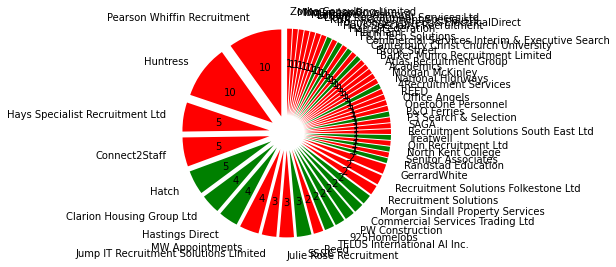

In [148]:
per_company_data = data_jobs_df.groupby("company").count().sort_values(by="job_title",ascending=False)["job_title"]
explode = [0.2]*len(per_company_data)

red_list = ["r"]*len(recruiters_in_data)
colour1 =  dict(zip(recruiters_in_data,red_list))

blue_list = ["g"]*len(companies_in_data)
colour2 =  dict(zip(companies_in_data,blue_list))

colours = {**colour1, **colour2}

labels = per_company_data.index #recruiters_in_data.append(companies_in_data) #.sort_values(ascending=True)
labels2 = ["recruiters","compaines"]

plt.pie(per_company_data, startangle=90, explode=explode, labels=labels, labeldistance= 1.2,
        colors=[colours[key] for key in labels],autopct="%1.f")
#plt.legend(labels = labels2,loc="lower right")
plt.show()
#display(per_company_data)

In [141]:
#per_company_data = data_jobs_df.groupby("company").count()#.sort_values(by="job_title",ascending=False)#["job_title"]
#labels = recruiters_in_data.append(companies_in_data).sort_values(ascending=True)
display(per_company_data)
display(per_company_data.index)

company
Pearson Whiffin Recruitment                       11
Huntress                                          11
Hays Specialist Recruitment Ltd                    6
Connect2Staff                                      6
Hatch                                              5
Clarion Housing Group Ltd                          4
Hastings Direct                                    4
MW Appointments                                    4
Jump IT Recruitment Solutions Limited              3
Julie Rose Recruitment                             3
SS&C                                               3
Reed                                               2
TELUS International AI Inc.                        2
925HomeJobs                                        2
PW Construction                                    2
Commercial Services Trading Ltd                    2
Morgan Sindall Property Services                   2
Recruitment Solutions                              2
Recruitment Solutions Folkestone Ltd  

Index(['Pearson Whiffin Recruitment', 'Huntress',
       'Hays Specialist Recruitment Ltd', 'Connect2Staff', 'Hatch',
       'Clarion Housing Group Ltd', 'Hastings Direct', 'MW Appointments',
       'Jump IT Recruitment Solutions Limited', 'Julie Rose Recruitment',
       'SS&C', 'Reed', 'TELUS International AI Inc. ', '925HomeJobs',
       'PW Construction', 'Commercial Services Trading Ltd',
       'Morgan Sindall Property Services', 'Recruitment Solutions',
       'Recruitment Solutions Folkestone Ltd', 'GerrardWhite',
       'Randstad Education', 'Senitor Associates', 'North Kent College',
       'Qin Recruitment Ltd', 'Treatwell',
       'Recruitment Solutions South East Ltd', 'SAGA', 'P3 Search & Selection',
       'P&O Ferries', 'OnetoOne Personnel', 'Office Angels', 'REED',
       '4Recruitment Services ', 'National Highways', 'Morgan McKinley',
       'Academics ', 'Atlas Recruitment Group',
       'Barker Munro Recruitment Limited', 'Brook Street',
       'Canterbury Christ C

In [149]:
display(colours)

{'4Recruitment Services': 'r',
 'Academics': 'r',
 'Atlas Recruitment Group': 'r',
 'Barker Munro Recruitment Limited': 'r',
 'Brook Street': 'r',
 'Commercial Services Interim & Executive Search': 'r',
 'Connect2Staff': 'r',
 'GerrardWhite': 'r',
 'Harnham': 'r',
 'Hays Specialist Recruitment': 'r',
 'Hays Specialist Recruitment Ltd': 'r',
 'Huntress': 'r',
 'Julie Rose Recruitment': 'r',
 'Jump IT Recruitment Solutions Limited': 'r',
 'KHR - Recruitment Specialists': 'r',
 'Lloyd Recruitment Services Ltd': 'r',
 'Lorien': 'r',
 'MW Appointments': 'r',
 'Manpower - Ashford': 'r',
 'McGregor Boyall': 'r',
 'Morgan Law': 'r',
 'Morgan McKinley': 'r',
 'Office Angels': 'r',
 'OnetoOne Personnel': 'r',
 'P3 Search & Selection': 'r',
 'Pearson Whiffin Recruitment': 'r',
 'Qin Recruitment Ltd': 'r',
 'REED': 'r',
 'Recruitment Solutions': 'r',
 'Recruitment Solutions Folkestone Ltd': 'r',
 'Recruitment Solutions South East Ltd': 'r',
 'Reed': 'r',
 'SAGA': 'r',
 'Senitor Associates': 'r',
 

In [91]:
Housing asscioations/property services
Education facilities
Goverment
Construction Compnies
Logistics Compnaies
Factories - Manufactoring
Brewer's
sales/marketing portions of companies
insureance

apprenticeship levy